In [11]:
import sys
sys.path.append('../')
from utils.config_utils import get_config
from utils.t5_utils import load_toolkit_datasets, get_trialized_data
import matplotlib.pyplot as plt
from matplotlib import cm, colors
import numpy as np

In [12]:
config = get_config()

In [13]:
datasets = load_toolkit_datasets(config)

In [14]:
config.defrost()
config.data.ol_align_field = 'start_time'
config.data.ol_align_range = [0, 2000]
config.freeze()

In [15]:
trialized_data = get_trialized_data(config, datasets)

Shortened 1 trials to prevent overlap.
Shortened 306 trials to prevent overlap.
Shortened 1 trials to prevent overlap.
Shortened 96 trials to prevent overlap.
Shortened 1 trials to prevent overlap.
Shortened 178 trials to prevent overlap.
Shortened 1 trials to prevent overlap.
Shortened 321 trials to prevent overlap.


## ONE SESSION -- 4 CONDITONS -- 0 to 2000 start_time

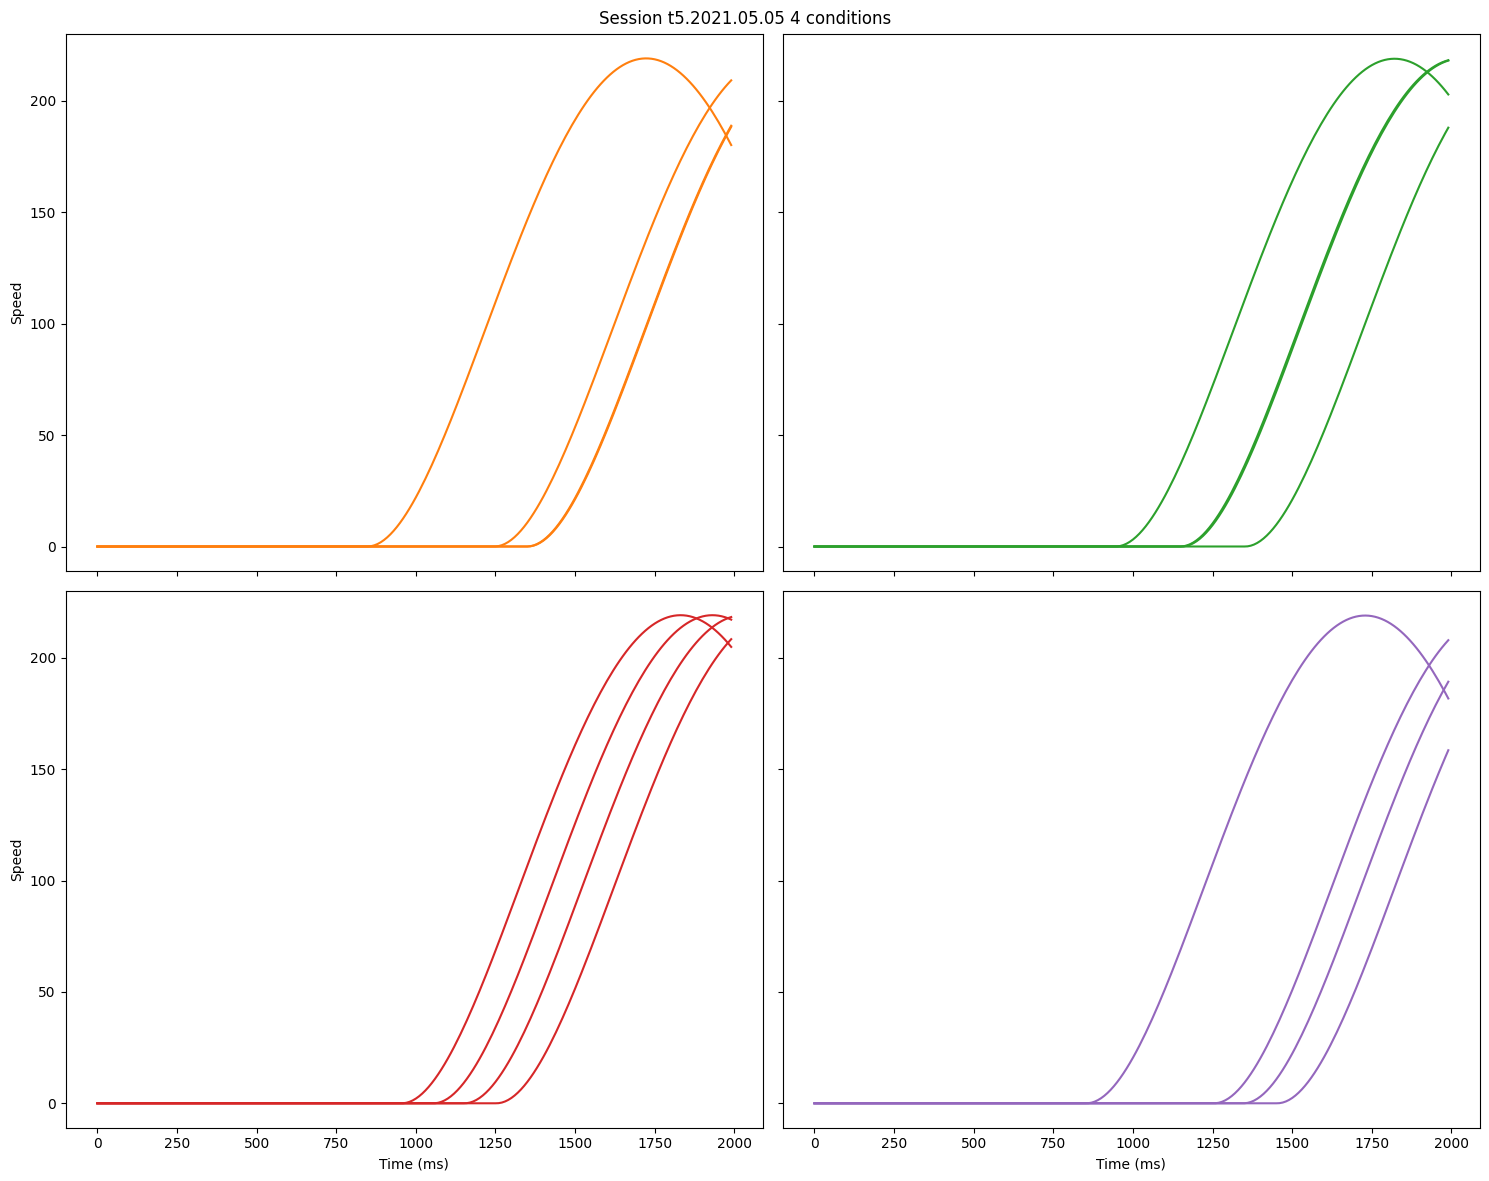

In [16]:
session = 't5.2021.05.05'

fig, axs = plt.subplots(2, 2, figsize=(15, 12), sharex='col', sharey='row')
for idx in range(4):
    for cond_id, trials in trialized_data[session]['ol_trial_data'].groupby('condition'):
        if cond_id == idx+1:
            for trial_id, trial in trials.groupby('trial_id'):
                speed = np.linalg.norm(trial.decVel, axis=1)
                axs.flat[idx].plot(range(0, len(speed)*10, 10), speed*1000, color=f'{colors.rgb2hex(cm.tab10(cond_id))}') #row=0, col=0

for ax in axs.flat: ax.set(xlabel='Time (ms)', ylabel='Speed')
for ax in axs.flat: ax.label_outer()

plt.suptitle('Session t5.2021.05.05 4 conditions')
plt.tight_layout()
plt.savefig(f'0_2000_start_4_conds.png', facecolor='white', transparent=False)
plt.show()

## 4 SESSIONS -- ALL CONDITIONS 0 to 2000 start_time

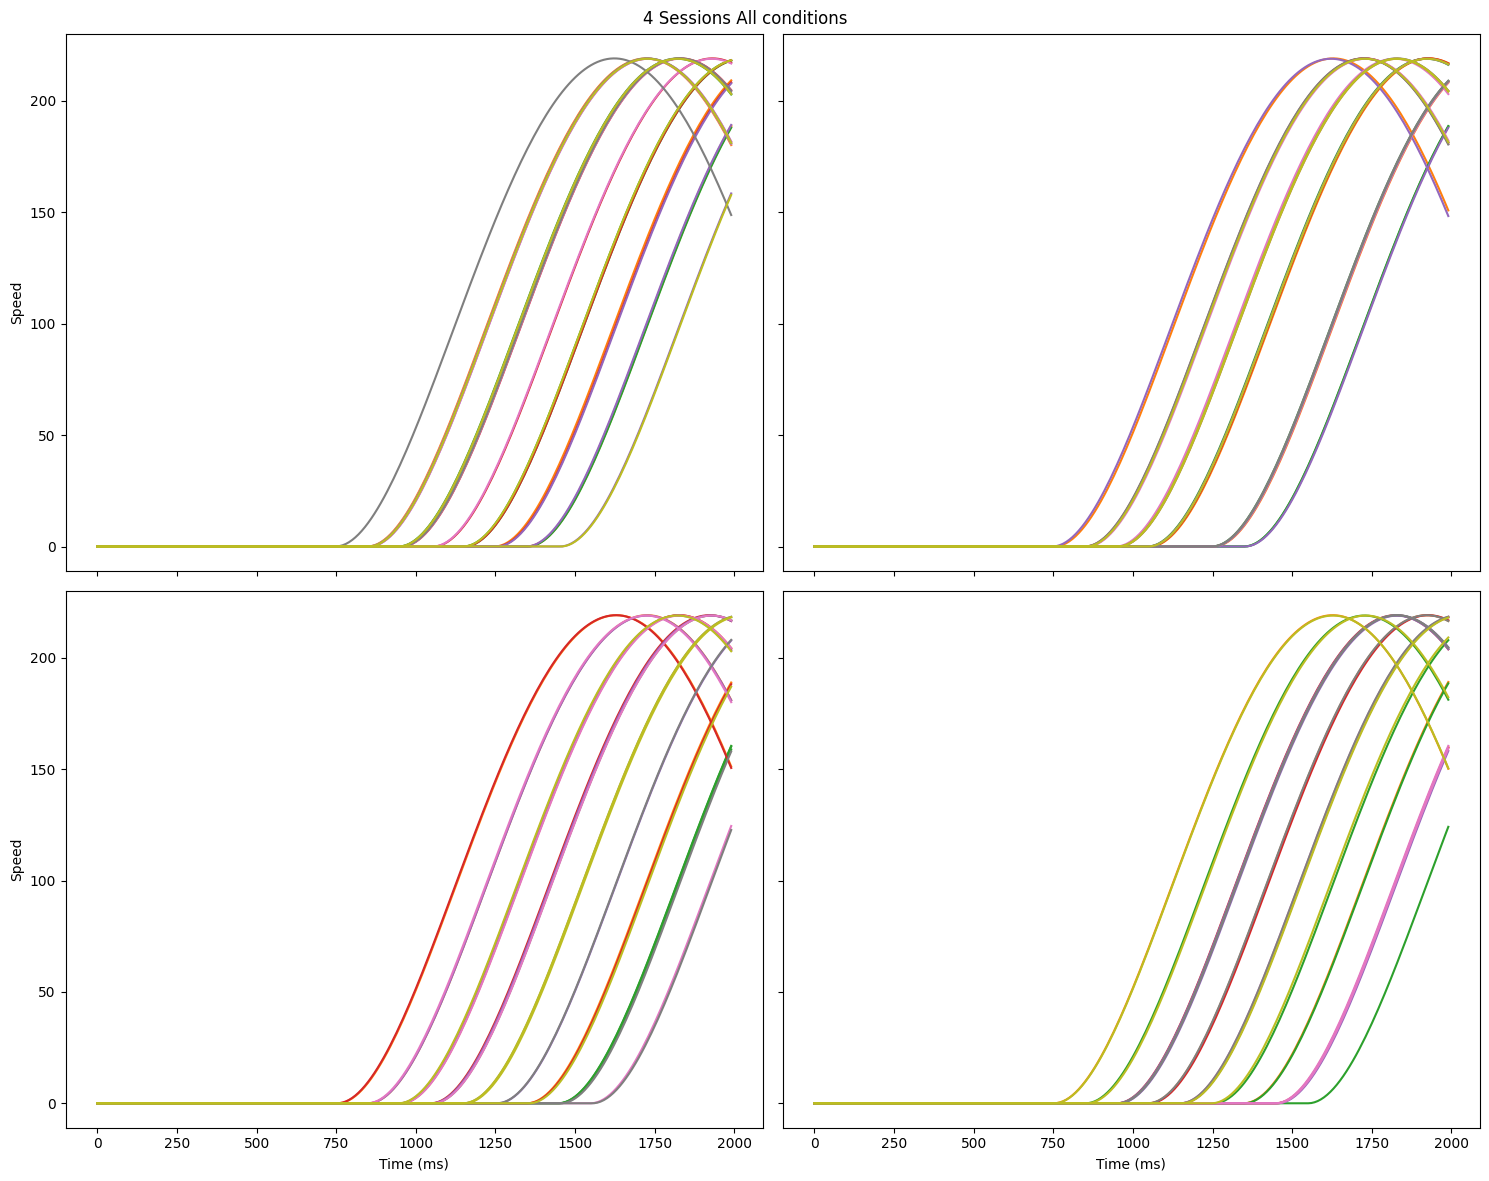

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(15, 12), sharex='col', sharey='row')
for idx, session in enumerate(config.data.sessions[:4]):
    for cond_id, trials in trialized_data[session]['ol_trial_data'].groupby('condition'):
        if cond_id != 0:
            for trial_id, trial in trials.groupby('trial_id'):
                speed = np.linalg.norm(trial.decVel, axis=1)
                axs.flat[idx].plot(range(0, len(speed)*10, 10), speed*1000, color=f'{colors.rgb2hex(cm.tab10(cond_id))}') #row=0, col=0

for ax in axs.flat: ax.set(xlabel='Time (ms)', ylabel='Speed')
for ax in axs.flat: ax.label_outer()
plt.suptitle('4 Sessions All conditions')

plt.tight_layout()
plt.savefig(f'0_2000_start_4_sessions.png', facecolor='white', transparent=False)
plt.show()

In [18]:
config.defrost()
config.data.ol_align_field = 'speed_onset'
config.data.ol_align_range = [0, 2000]
config.freeze()

In [19]:
trialized_data = get_trialized_data(config, datasets)

Shortened 306 trials to prevent overlap.
Shortened 96 trials to prevent overlap.
Shortened 178 trials to prevent overlap.
Shortened 321 trials to prevent overlap.


## ONE SESSION -- 4 CONDITONS -- 0 to 2000 speed_onset

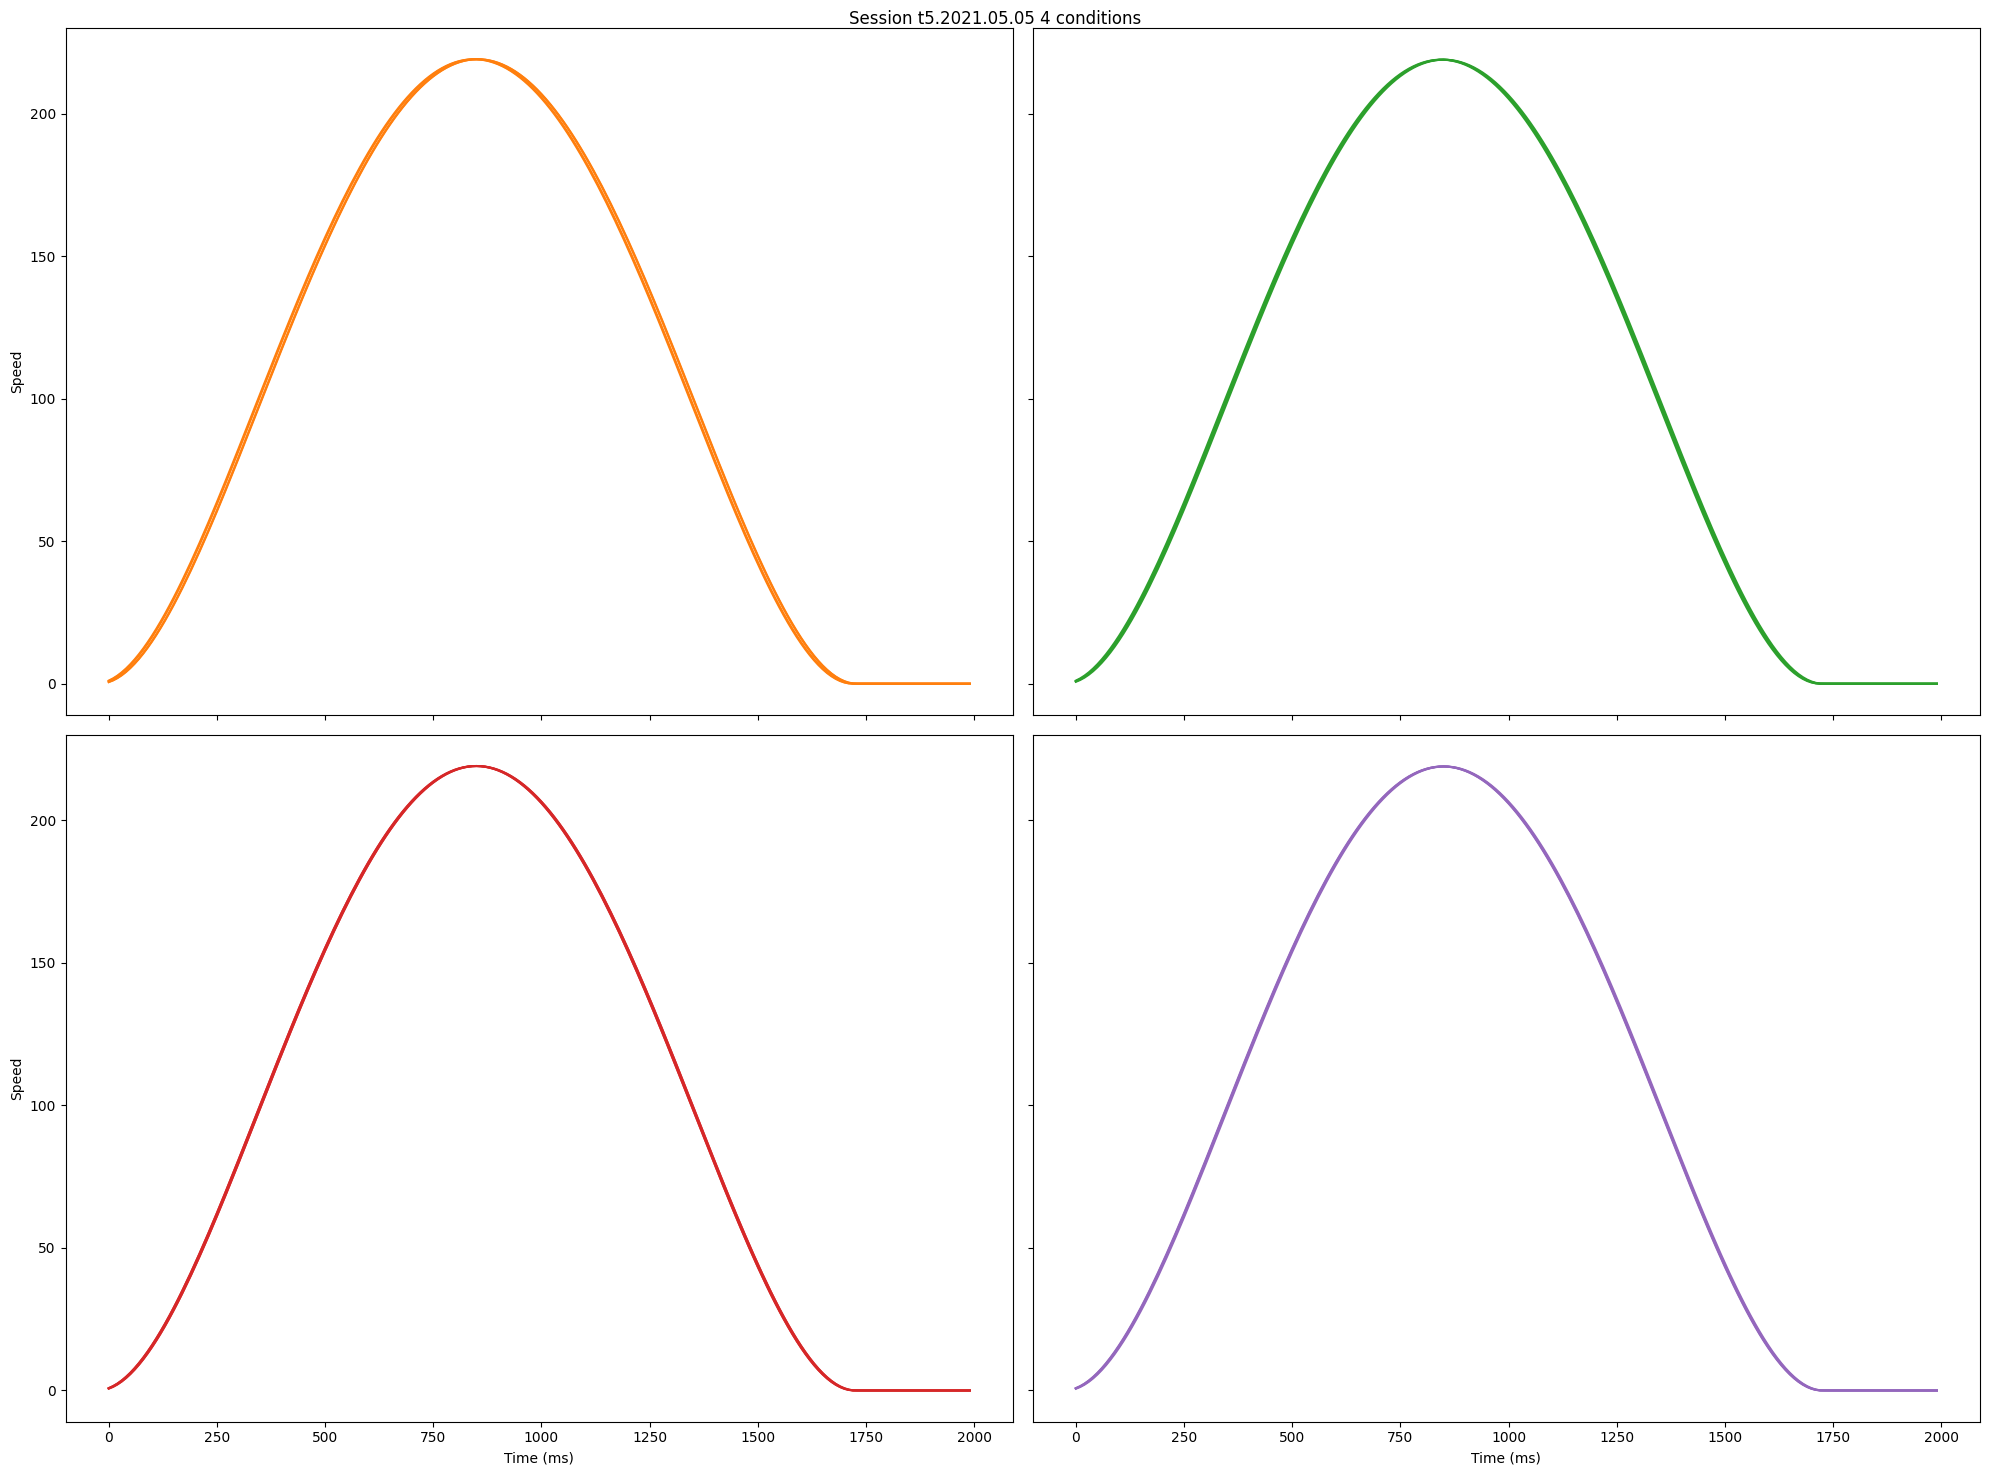

In [20]:
session = 't5.2021.05.05'

fig, axs = plt.subplots(2, 2, figsize=(20, 15), sharex='col', sharey='row')
for idx in range(4):
    for cond_id, trials in trialized_data[session]['ol_trial_data'].groupby('condition'):
        if cond_id == idx+1:
            for trial_id, trial in trials.groupby('trial_id'):
                speed = np.linalg.norm(trial.decVel, axis=1)
                axs.flat[idx].plot(range(0, len(speed)*10, 10), speed*1000, color=f'{colors.rgb2hex(cm.tab10(cond_id))}') #row=0, col=0

for ax in axs.flat: ax.set(xlabel='Time (ms)', ylabel='Speed')
for ax in axs.flat: ax.label_outer()

plt.suptitle('Session t5.2021.05.05 4 conditions')
plt.tight_layout()
plt.savefig(f'0_2000_move_4_conds.png', facecolor='white', transparent=False)
plt.show()

## 4 SESSIONS -- ALL CONDITIONS 0 to 2000 speed_onset

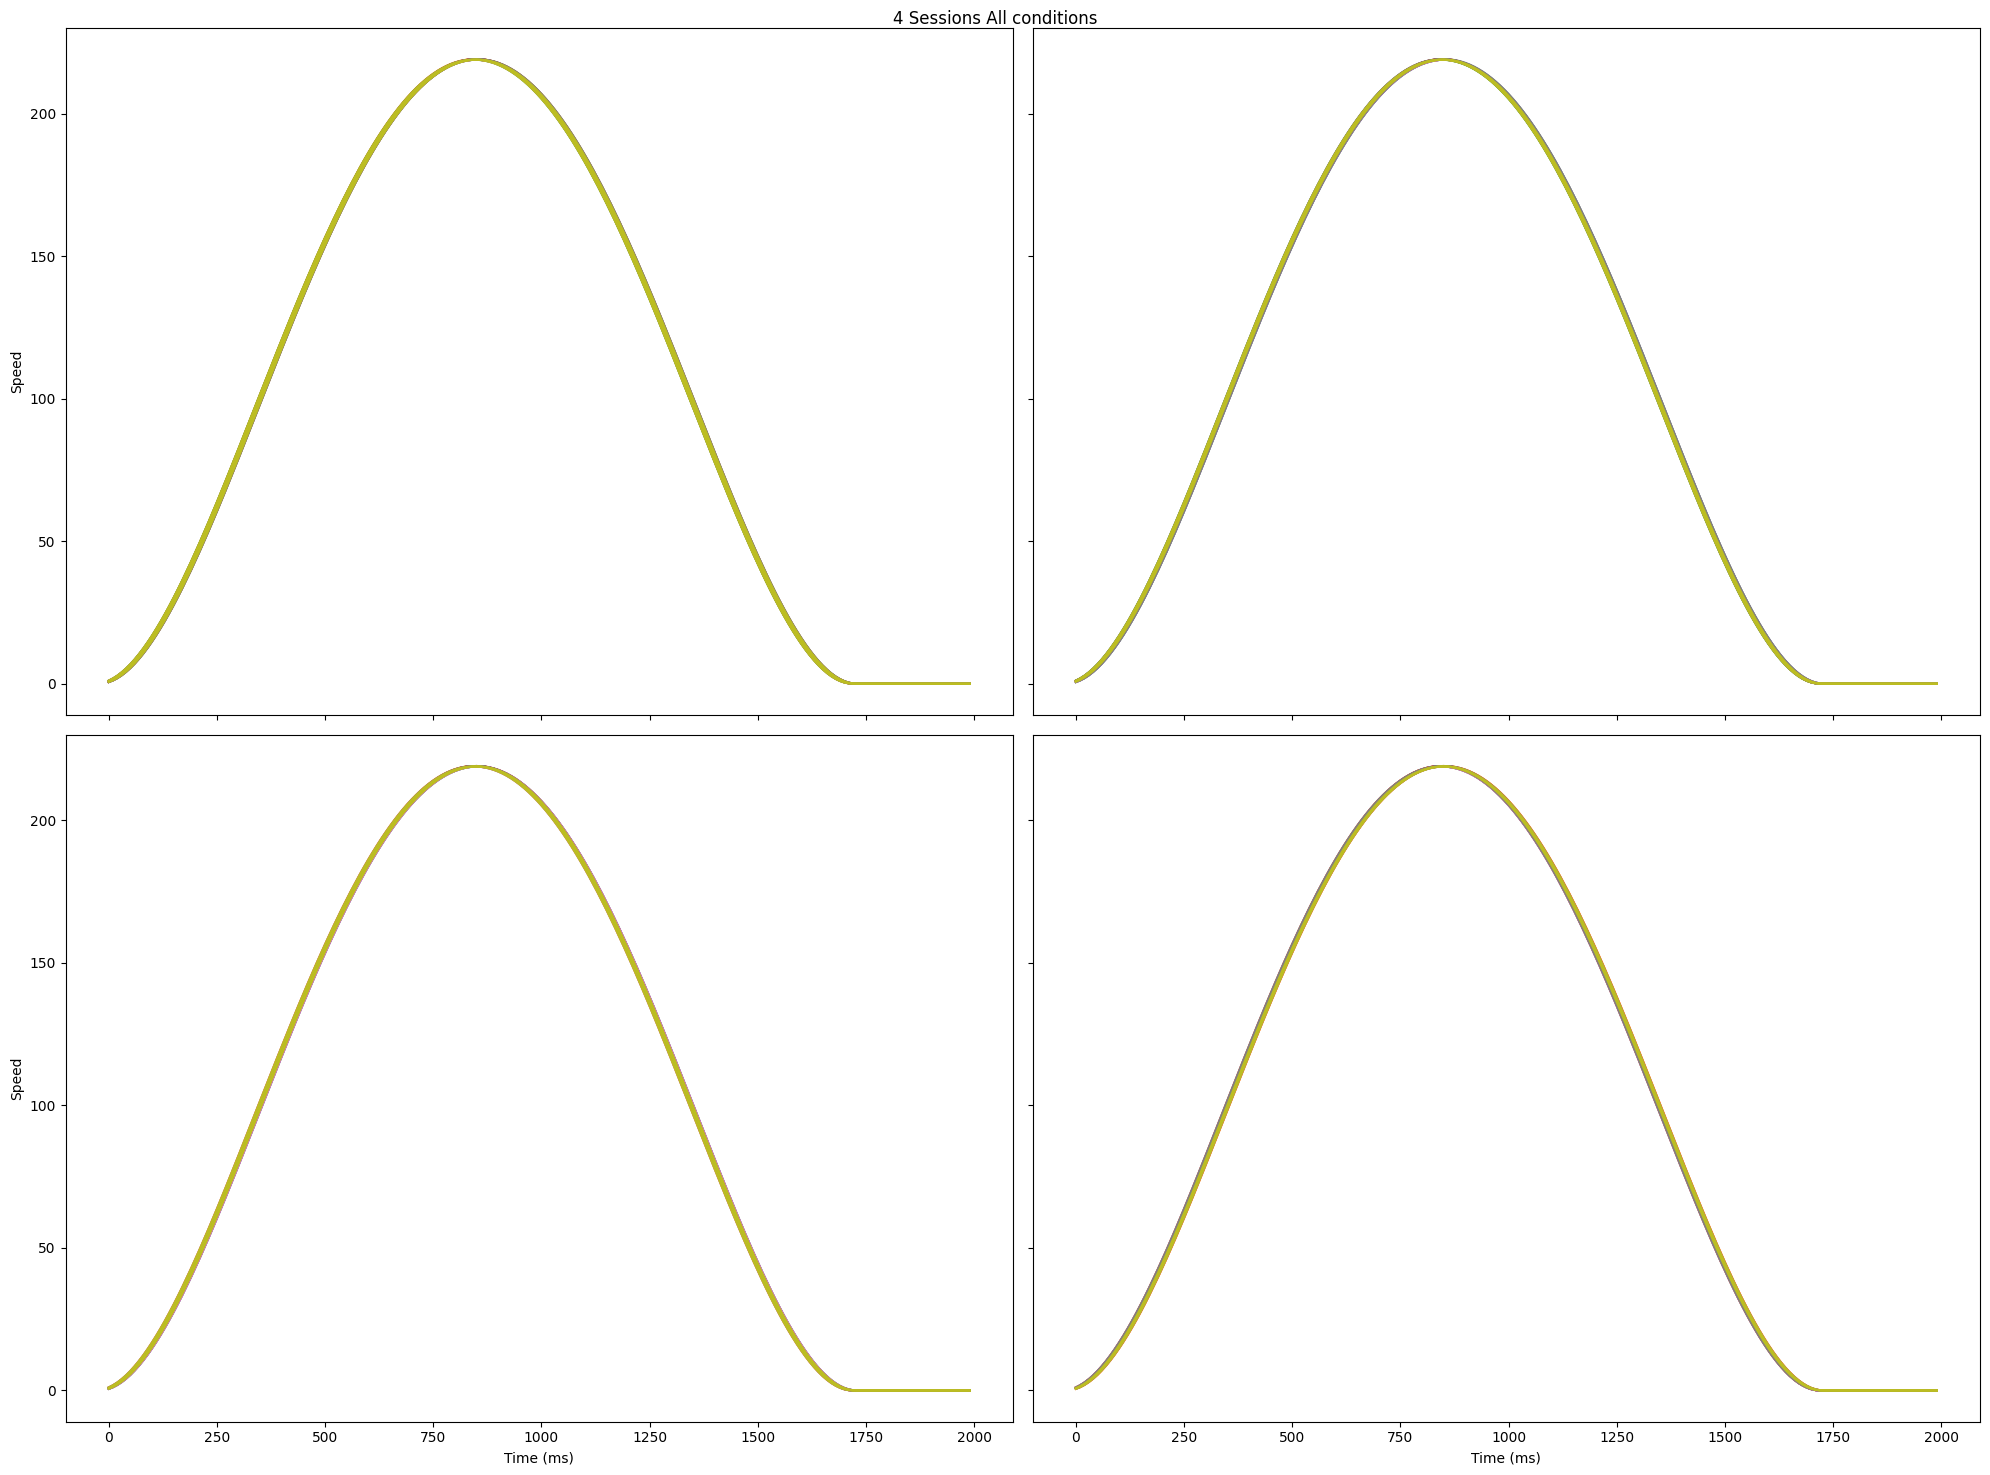

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(20, 15), sharex='col', sharey='row')
for idx, session in enumerate(config.data.sessions[:4]):
    for cond_id, trials in trialized_data[session]['ol_trial_data'].groupby('condition'):
        if cond_id != 0:
            for trial_id, trial in trials.groupby('trial_id'):
                speed = np.linalg.norm(trial.decVel, axis=1)
                axs.flat[idx].plot(range(0, len(speed)*10, 10), speed*1000, color=f'{colors.rgb2hex(cm.tab10(cond_id))}') #row=0, col=0

for ax in axs.flat: ax.set(xlabel='Time (ms)', ylabel='Speed')
for ax in axs.flat: ax.label_outer()

plt.suptitle('4 Sessions All conditions')
plt.tight_layout()
plt.savefig(f'0_2000_move_4_sessions.png', facecolor='white', transparent=False)
plt.show()

(230, 403)
(1, 403)


ValueError: Shape of array too small to calculate a numerical gradient, at least (edge_order + 1) elements are required.

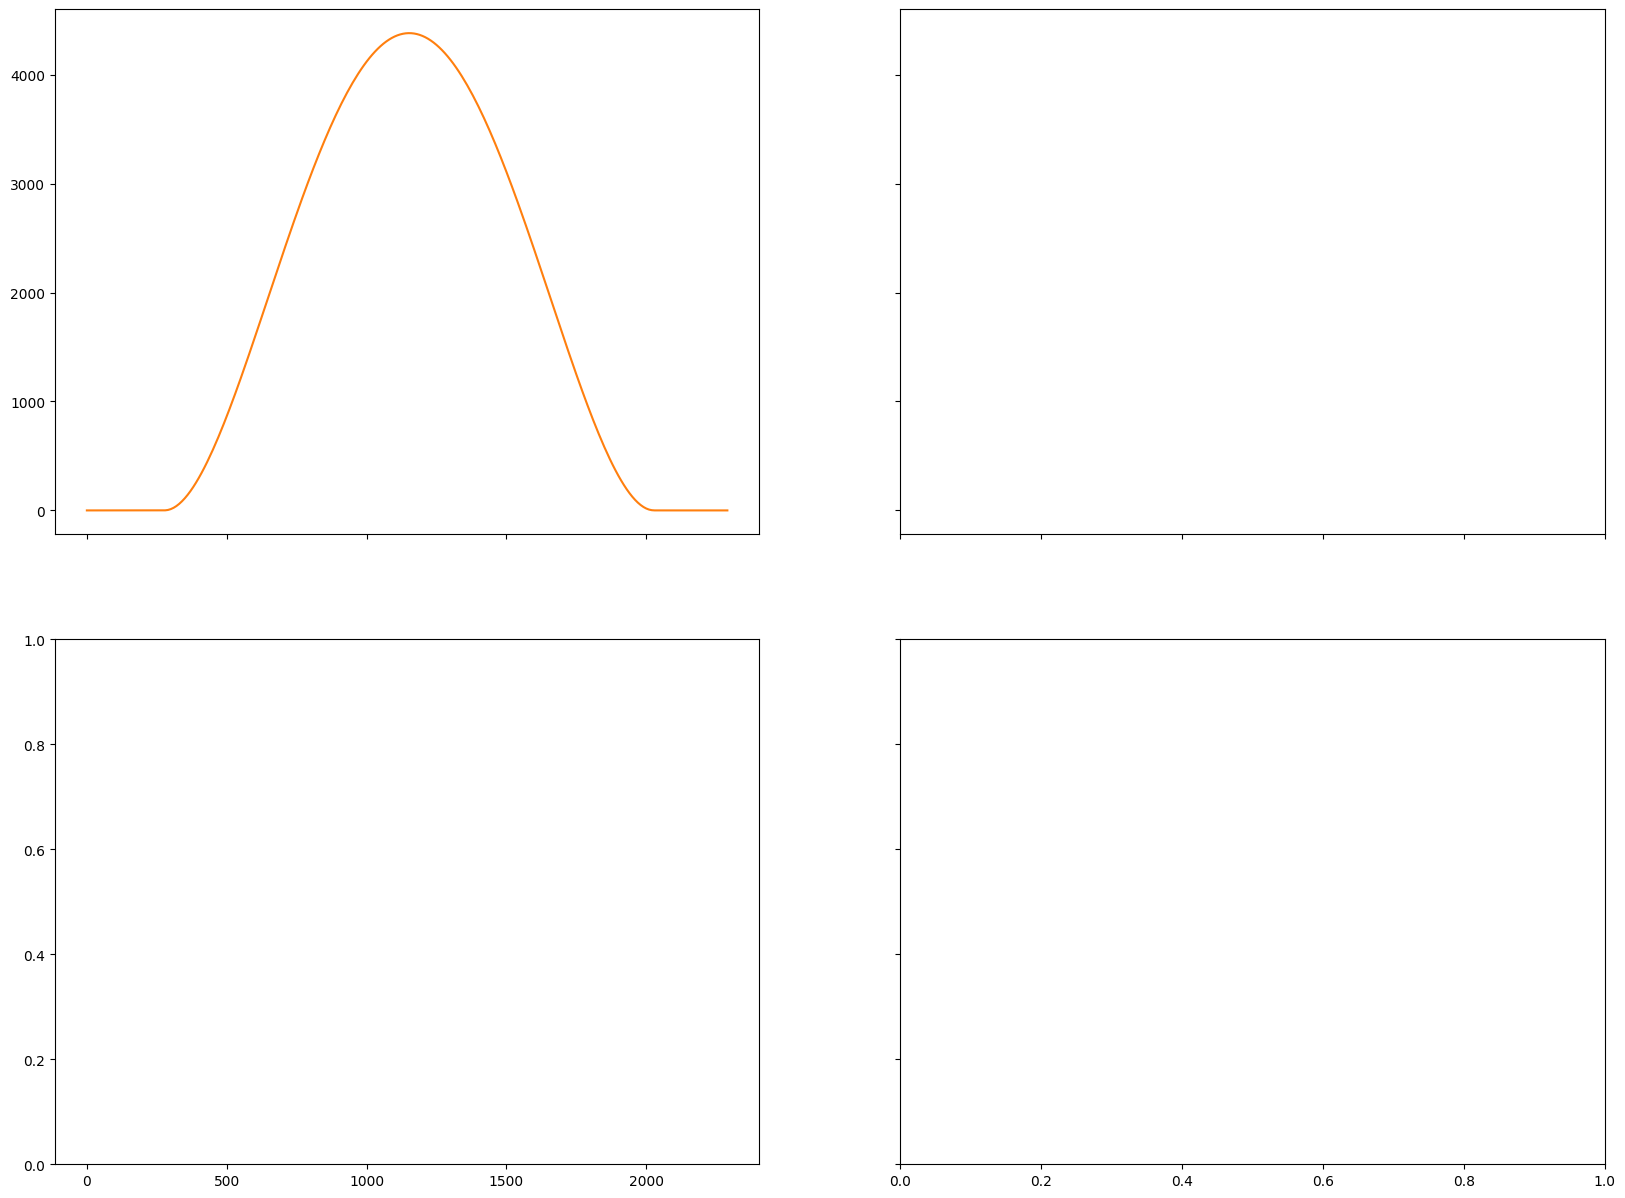

In [42]:
trial_len = (config.data.ol_align_range[1] - config.data.ol_align_range[0]) / config.data.bin_size

fig, axs = plt.subplots(2, 2, figsize=(20, 15), sharex='col', sharey='row')
for idx, session in enumerate(config.data.sessions[:4]):
    for cond_id, trials in trialized_data[session]['ol_trial_data'].groupby('condition'):
        if cond_id != 0:
            for trial_id, trial in trials.groupby('trial_id'):
                if trial.shape[0] == trial_len:
                    speed = np.gradient(trial.cursorPos.y)
                    axs.flat[idx].plot(range(0, len(speed)*10, 10), speed*1000, color=f'{colors.rgb2hex(cm.tab10(cond_id))}') #row=0, col=0

for ax in axs.flat: ax.set(xlabel='Time (ms)', ylabel='Speed')
for ax in axs.flat: ax.label_outer()

plt.tight_layout()

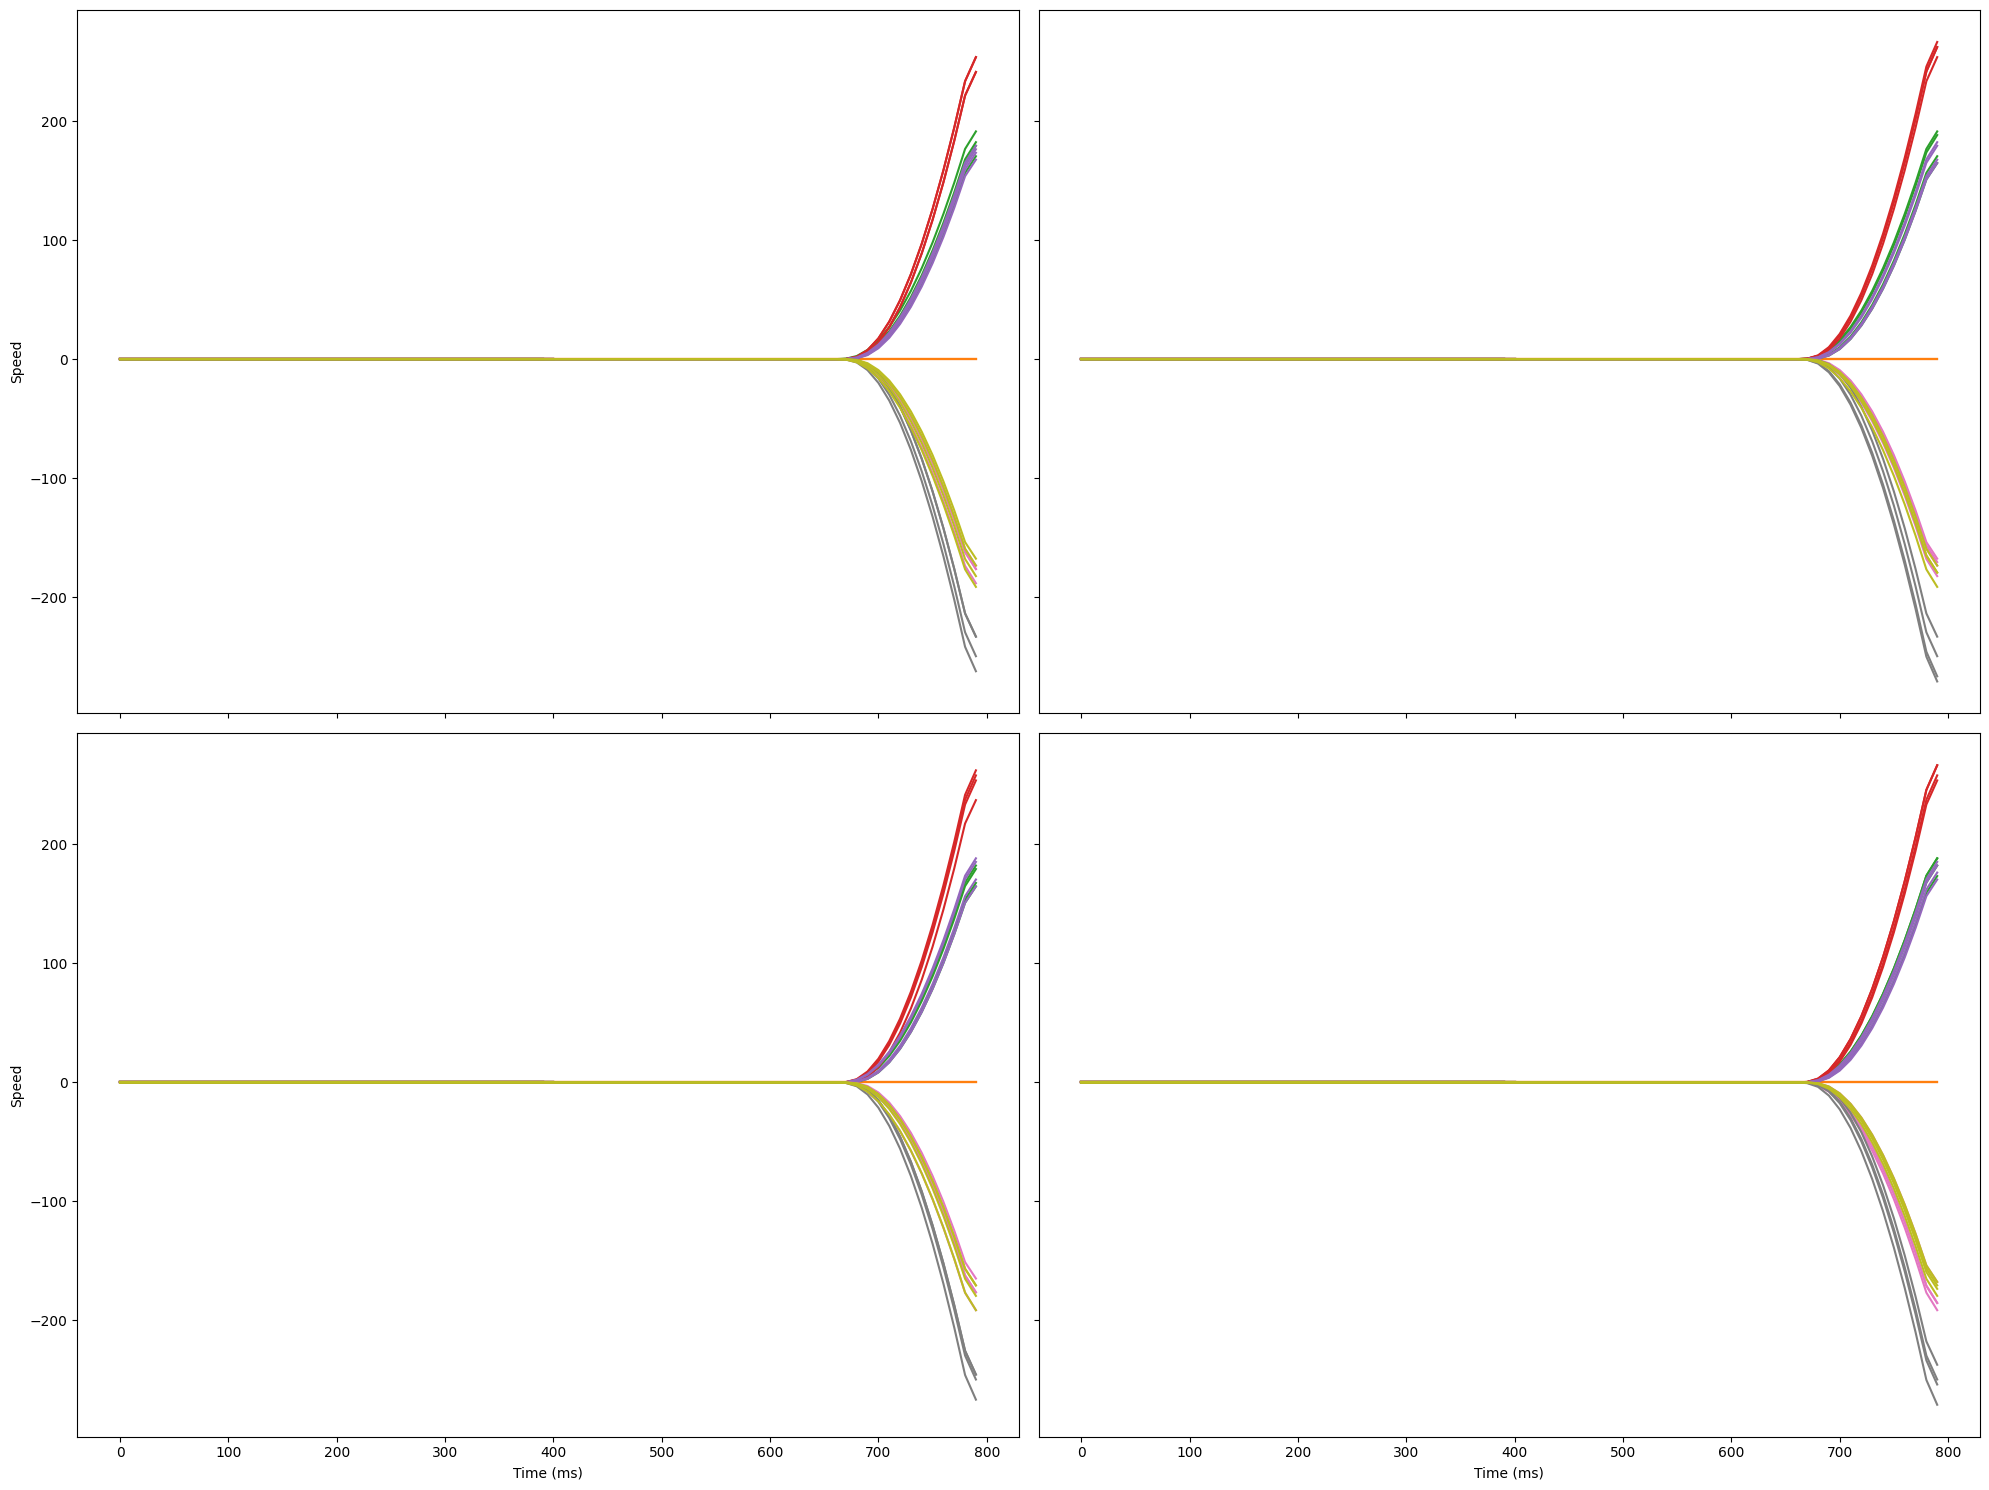

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(20, 15), sharex='col', sharey='row')
for idx, session in enumerate(config.data.sessions[:4]):
    for cond_id, trials in trialized_data[session]['ol_trial_data'].groupby('condition'):
        if cond_id != 0:
            for trial_id, trial in trials.groupby('trial_id'):
                speed = np.gradient(trial.cursorPos.x)
                axs.flat[idx].plot(range(0, len(speed)*10, 10), speed*1000, color=f'{colors.rgb2hex(cm.tab10(cond_id))}') #row=0, col=0

for ax in axs.flat: ax.set(xlabel='Time (ms)', ylabel='Speed')
for ax in axs.flat: ax.label_outer()

plt.tight_layout()